<a href="https://colab.research.google.com/github/logisasaichetan/wastedemo/blob/main/cnnModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install -q kaggle

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"logisasaichetan","key":"0548f0091ffdc92c646eaf23a2866e63"}'}

In [14]:
! mkdir ~/.kaggle

In [15]:
! cp kaggle.json ~/.kaggle/

In [16]:
! chmod 600 /root/.kaggle/kaggle.json

In [17]:
! kaggle datasets list

ref                                                      title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                       Vehicle Sales Data                               19MB  2024-02-21 20:16:17           5445         90  1.0              
tarunrm09/climate-change-indicators                      Climate change Indicators                        34KB  2024-02-22 08:53:54           2545         61  1.0              
nelgiriyewithana/apple-quality                           Apple Quality                                   170KB  2024-01-11 14:31:07          24658        527  1.0              
devi5723/e-commerce-cosmetics-dataset                    E-commerce Cosmetic Products                      1MB  202

In [18]:
! kaggle datasets download aashidutt3/waste-segregation-image-dataset

 99% 1.16G/1.17G [00:15<00:00, 75.4MB/s]
100% 1.17G/1.17G [00:15<00:00, 81.6MB/s]


In [19]:
! unzip waste-segregation-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/train/biodegradable/leaf_waste/16613329-813d-4d3d-9f44-e52c0ad72bb0___RS_Late.B 4980.JPG  
  inflating: Dataset/train/biodegradable/leaf_waste/16984239-2e67-407e-b600-4a3666500534___RS_Late.B 5182.JPG  
  inflating: Dataset/train/biodegradable/leaf_waste/1745208a-82b2-4a82-9791-d812cb016850___GHLB2 Leaf 95.JPG  
  inflating: Dataset/train/biodegradable/leaf_waste/18568211-18d7-453f-84a4-d22e2088ec33___RS_Late.B 5239.JPG  
  inflating: Dataset/train/biodegradable/leaf_waste/1909260c-1e08-4a8f-a702-60549ada08b2___RS_Late.B 6671.JPG  
  inflating: Dataset/train/biodegradable/leaf_waste/192c9d29-4a86-457b-a779-1dd36f225a5b___RS_Early.B 8012.JPG  
  inflating: Dataset/train/biodegradable/leaf_waste/1a017b74-a549-433b-979b-3e3ace67b50d___GCREC_Bact.Sp 5715.JPG  
  inflating: Dataset/train/biodegradable/leaf_waste/1a067cc9-cf70-41a5-a51c-aa0f6b8a936d___UF.GRC_BS_Lab Leaf 0327.JPG  
  inflating: Dataset/train/biodegradable

In [20]:
import tensorflow as tf
print(tf.__version__)



2.15.0


In [21]:
train_path = "/content/Dataset/train"
test_path = "/content/Dataset/val"

In [22]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from glob import glob

In [24]:
"""
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import model_from_json

# Example CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile and train the model (Replace this with your actual training code)

# Save model architecture as JSON
# Save model architecture as JSON
model_json = model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights("cnn_model_weights.h5")

"""

'\nfrom keras.models import Sequential\nfrom keras.layers import Conv2D, MaxPooling2D, Flatten, Dense\nfrom keras.models import model_from_json\n\n# Example CNN model architecture\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), activation=\'relu\', input_shape=(28, 28, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(64, (3, 3), activation=\'relu\'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(64, (3, 3), activation=\'relu\'))\nmodel.add(Flatten())\nmodel.add(Dense(64, activation=\'relu\'))\nmodel.add(Dense(10, activation=\'softmax\'))\n\n# Compile and train the model (Replace this with your actual training code)\n\n# Save model architecture as JSON\n# Save model architecture as JSON\nmodel_json = model.to_json()\nwith open("cnn_model.json", "w") as json_file:\n    json_file.write(model_json)\n\n# Save model weights\nmodel.save_weights("cnn_model_weights.h5")\n\n'

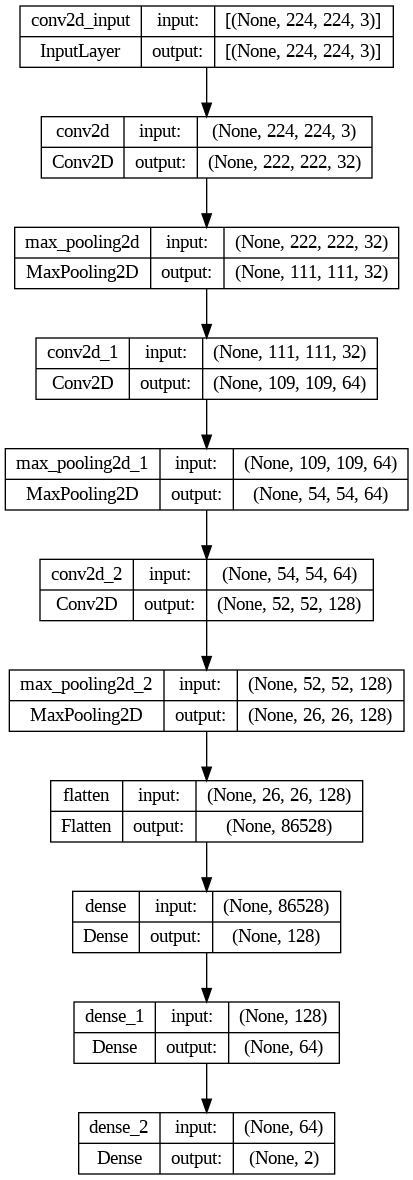

In [25]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [27]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [28]:
"""from keras.preprocessing.image import ImageDataGenerator

# Define batch size
batch_size = 32

# Define paths for training and testing data
train_path = '/content/Dataset/train'

test_path = '/content/Dataset/val'

# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define generators for training and testing data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')
"""

"from keras.preprocessing.image import ImageDataGenerator\n\n# Define batch size\nbatch_size = 32\n\n# Define paths for training and testing data\ntrain_path = '/content/Dataset/train'\n\ntest_path = '/content/Dataset/val'\n\n# Create image data generators\ntrain_datagen = ImageDataGenerator(\n    rescale=1./255,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True)\n\ntest_datagen = ImageDataGenerator(rescale=1./255)\n\n# Define generators for training and testing data\ntrain_generator = train_datagen.flow_from_directory(\n    train_path,\n    target_size=(224, 224),\n    batch_size=batch_size,\n    color_mode='rgb',\n    class_mode='categorical')\n\ntest_generator = test_datagen.flow_from_directory(\n    test_path,\n    target_size=(224, 224),\n    batch_size=batch_size,\n    color_mode='rgb',\n    class_mode='categorical')\n"

In [29]:
from keras.preprocessing.image import ImageDataGenerator

# Define batch size
batch_size = 32

# Define paths for training and testing data
train_path = '/content/Dataset/train'
test_path = '/content/Dataset/val'

# Create image data generators with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data will be used for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'  # Specify training subset
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

# Define generator for testing data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)


Found 11333 images belonging to 2 classes.
Found 2832 images belonging to 2 classes.
Found 1201 images belonging to 2 classes.


In [30]:
"""from PIL import Image
import os

def find_corrupted_images(dataset_path):
    corrupted_images = []

    for root, dirs, files in os.walk(dataset_path):
        for filename in files:
            file_path = os.path.join(root, filename)
            try:
                # Attempt to open the image
                with Image.open(file_path) as img:
                    img.load()
            except (IOError, SyntaxError) as e:
                # Catch IOError and SyntaxError exceptions (indicating corrupted images)
                corrupted_images.append(file_path)

    return corrupted_images

# Example usage:
dataset_path = "/content/Dataset"
corrupted_images = find_corrupted_images(dataset_path)
print("Corrupted images:", corrupted_images)
"""

'from PIL import Image\nimport os\n\ndef find_corrupted_images(dataset_path):\n    corrupted_images = []\n    \n    for root, dirs, files in os.walk(dataset_path):\n        for filename in files:\n            file_path = os.path.join(root, filename)\n            try:\n                # Attempt to open the image\n                with Image.open(file_path) as img:\n                    img.load()\n            except (IOError, SyntaxError) as e:\n                # Catch IOError and SyntaxError exceptions (indicating corrupted images)\n                corrupted_images.append(file_path)\n    \n    return corrupted_images\n\n# Example usage:\ndataset_path = "/content/Dataset"\ncorrupted_images = find_corrupted_images(dataset_path)\nprint("Corrupted images:", corrupted_images)\n'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer with softmax activation for multiclass classification
model.add(Dense(2, activation='softmax')) # num_classes should be defined based on your dataset

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

model_json = model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights("cnn_model_weights.h5")


Epoch 1/10
 91/354 [======>.......................] - ETA: 15:15 - loss: 0.3291 - accuracy: 0.9071

In [ ]:
import matplotlib.pyplot as plt



# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Compile the model
"""model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(
        generator=train_generator,
        epochs=10,
        validation_data=test_generator)"""




In [ ]:
"""hist = model.fit(
    generator=train_generator,
    epochs=10,
    validation_data=test_generator,
    use_multiprocessing=False)"""